# OUTLINE
 1 Python basics : Setup, syntax & standard libraries
        
2 Pymatgen 1 : build a structure & write a vasp job
    
3 Python + slurm + bash : launch a vasp job
    
__4 Pymatgen 2 : read a vasp job & plot DOS__
    
5 Matplotlib : make your own plots 
    
6 Pymatgen 3 : advanced functionalities (disorder, bader, lobster ... )
    
7 the read_write library : installation, work flow & examples


# Session 4 : Pymatgen 2 : read a vasp job & plot DOS
## Read vasprun
* Parsing vasprun : the Vasprun Class
* extracting data from a Vasprun instance
* Plotting data (using pymatgen plotter)
## Optimization
* Drone & Computed_entry
* Parallelization


# Read vasprun
## the Vasprun Class

In [1]:
from pymatgen.io.vasp import Vasprun
v = Vasprun('H2O2_converged_run/vasprun.xml')


## Get total energy and relaxed structure

In [2]:
print(v.converged)
print(v.efermi)
print(v.final_energy) # final total energy
s = v.final_structure
print(s) # relaxed structure

True
-6.44388648
-18.18675923 eV
Full Formula (H2 O2)
Reduced Formula: H2O2
abc   :  20.000000  20.000000  20.000000
angles:  90.000000  90.000000  90.000000
Sites (4)
  #  SP           a         b         c  selective_dynamics
---  ----  --------  --------  --------  ---------------------
  0  H     0.491561  0.547277  0.49067   [True, True, True]
  1  H     0.581971  0.490219  0.547185  [True, True, True]
  2  O     0.5       0.5       0.5       [False, False, False]
  3  O     0.573527  0.5       0.5       [True, False, False]


## Plot Total DOS

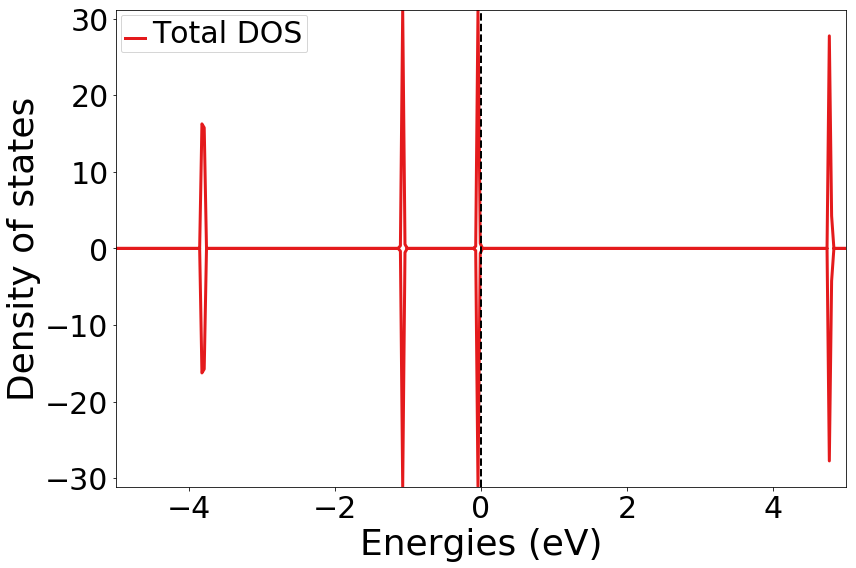

In [4]:
from pymatgen.electronic_structure.plotter import DosPlotter
tdos = v.tdos #total DOS
plotter = DosPlotter()
plotter.add_dos("Total DOS", tdos)
plotter.show(xlim=[-5, 5]) #, ylim=[0, 4])

## Plot element-projected DOS

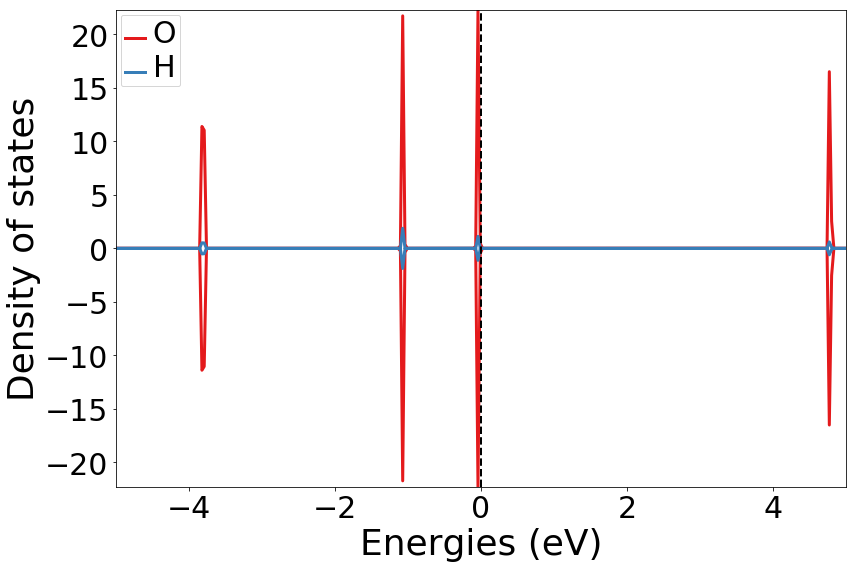

In [6]:
cdos = v.complete_dos
element_dos = cdos.get_element_dos()
plotter = DosPlotter()
plotter.add_dos_dict(element_dos)
plotter.show(xlim=[-5, 5]) # , ylim=[0, 1])

## Plot orbital-projected DOS

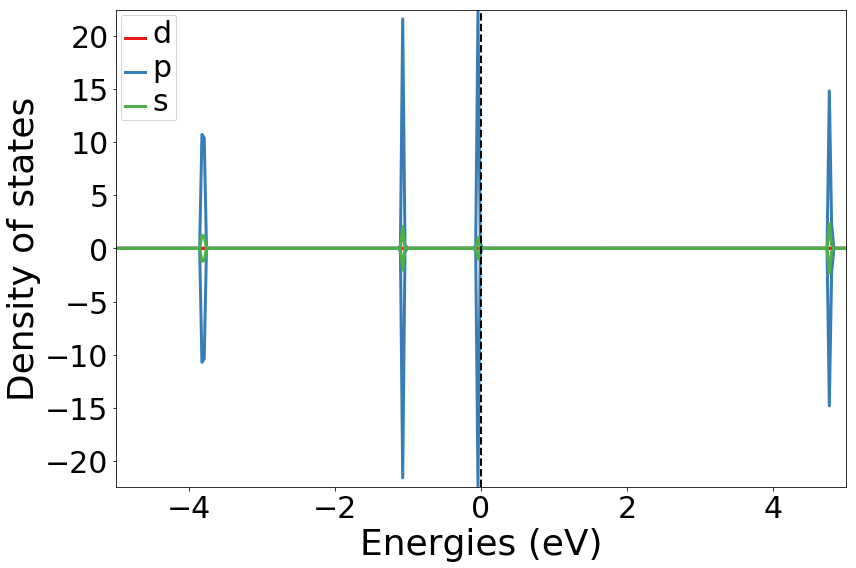

In [8]:
spd_dos = cdos.get_spd_dos()
plotter = DosPlotter()
plotter.add_dos_dict(spd_dos)
plotter.show(xlim=[-5, 5]) # , ylim=[0, 1])

# Plot BS

In [ ]:
# haven't done it yet ! 

from pymatgen.io.vasp import Vasprun, BSVasprun
from pymatgen.electronic_structure.plotter import BSPlotter

v = BSVasprun("Si-band/vasprun.xml")
bs = v.get_band_structure(kpoints_filename="Si-band/KPOINTS",
                          line_mode=True)
plt = BSPlotter(bs)
plt.get_plot(vbm_cbm_marker=True)

# Optimization 

## the ComputedEntry class
`Vasprun` : contains ALL the data, exhaustive but HEAVY (to read and to manipulate)

`ComputedEntry` : much lighter object, contains only the required data
* Energy (if the run converged)
* Structure (optionnal)
* any other data contained in the Vasprun

### How to get a ComputedEntry
Directly from the vasprun (saves memory but still need to parse all vasprun)

In [9]:
v.get_computed_entry(inc_structure=True, # include structure if required
                    parameters=['incar'], # incluide any parameters of the run 
                    data=['efermi','converged'])

ComputedStructureEntry None - H2 O2
Energy = -18.1868
Correction = 0.0000
Parameters:
is_hubbard = False
incar = ALGO = Normal
EDIFF = 1e-06
EDIFFG = -0.001
ENCUT = 600.0
IBRION = 1
ICHARG = 0
ISIF = 0
ISMEAR = 0
ISPIN = 2
ISYM = 0
KPOINT_BSE = -1 0 0 0
LAECHG = True
LASPH = True
LCHARG = True
LMAXMIX = 4
LORBIT = 11
LREAL = False
LWAVE = True
MAGMOM = 4*0.6
NEDOS = 1001
NELECT = 14.0
NELM = 100
NELMDL = -12
NELMIN = 4
NSW = 200
PREC = accurate
SIGMA = 0.01
SYSTEM = H2-o2__ne_000_d_130

hubbards = {}
run_type = None or LDA
potcar_spec = [{'titel': 'PAW_PBE H 15Jun2001', 'hash': '4923e7a833556cc0a96744438c6686b8'}, {'titel': 'PAW_PBE O 08Apr2002', 'hash': '9bb4b91e6c47f70fd2bce603bd5d6832'}]
potcar_symbols = ['PAW_PBE H 15Jun2001', 'PAW_PBE O 08Apr2002']
Data:
efermi = -6.44388648
converged = True

### the Drone class
From an efficient parsing processor, a Drone :
save memory & reading time

In [31]:
from pymatgen.apps.borg.hive import  VaspToComputedEntryDrone

personalized_drone = VaspToComputedEntryDrone(inc_structure=True,
                                            parameters=["incar"],
                                            data=['efermi', "converged"])
job_folder = "H2O2_converged_run"
computed_entry = personalized_drone.assimilate(job_folder)
print(computed_entry)

ComputedStructureEntry None - H2 O2
Energy = -18.1868
Correction = 0.0000
Parameters:
is_hubbard = False
incar = ALGO = Normal
EDIFF = 1e-06
EDIFFG = -0.001
ENCUT = 600.0
IBRION = 1
ICHARG = 0
ISIF = 0
ISMEAR = 0
ISPIN = 2
ISYM = 0
KPOINT_BSE = -1 0 0 0
LAECHG = True
LASPH = True
LCHARG = True
LMAXMIX = 4
LORBIT = 11
LREAL = False
LWAVE = True
MAGMOM = 4*0.6
NEDOS = 1001
NELECT = 14.0
NELM = 100
NELMDL = -12
NELMIN = 4
NSW = 200
PREC = accurate
SIGMA = 0.01
SYSTEM = H2-o2__ne_000_d_130

hubbards = {}
run_type = None or LDA
potcar_spec = [{'titel': 'PAW_PBE H 15Jun2001', 'hash': '4923e7a833556cc0a96744438c6686b8'}, {'titel': 'PAW_PBE O 08Apr2002', 'hash': '9bb4b91e6c47f70fd2bce603bd5d6832'}]
potcar_symbols = ['PAW_PBE H 15Jun2001', 'PAW_PBE O 08Apr2002']
Data:
efermi = -6.44388648
converged = True


There is also a drone for non-converged folders, were vasprun is corrupted or not even computed.

It basically reads as much *CAR as it can (CONTCAR, OUTCAR, OSZICAR, INCAR, ...). 

In [30]:
from pymatgen.apps.borg.hive import SimpleVaspToComputedEntryDrone

simple_drone = SimpleVaspToComputedEntryDrone(inc_structure=True)

job_folder = "H2O2_no_vasprun"
computed_entry = simple_drone.assimilate(job_folder)
# computed_entry.energy = 1000
print(computed_entry)

Full Formula (H2 O2)
Reduced Formula: H2O2
abc   :  20.000000  20.000000  20.000000
angles:  90.000000  90.000000  90.000000
Sites (4)
  #  SP           a         b         c  selective_dynamics     velocities
---  ----  --------  --------  --------  ---------------------  ---------------
  0  H     0.491561  0.547277  0.49067   [True, True, True]     [0.0, 0.0, 0.0]
  1  H     0.581971  0.490219  0.547185  [True, True, True]     [0.0, 0.0, 0.0]
  2  O     0.5       0.5       0.5       [False, False, False]  [0.0, 0.0, 0.0]
  3  O     0.573527  0.5       0.5       [True, False, False]   [0.0, 0.0, 0.0]
ComputedStructureEntry None - H2 O2
Energy = -18.1868
Correction = 0.0000
Parameters:
hubbards = {}
is_hubbard = False
run_type = None
potcar_spec = [{'symbol': 'H', 'hash': '4923e7a833556cc0a96744438c6686b8'}, {'symbol': 'O', 'hash': '9bb4b91e6c47f70fd2bce603bd5d6832'}]
Data:
filename = H2O2_no_vasprun
delta_volume = 0.0


## Manupilating ComputedEntry instances 
the `ComputedEntry` class is quite basic. 

But we can build a `Rundict` class which inherits from `ComputedEntry`.

We can then add whatever functions we want to the `Rundict` class. 

In [ ]:
class Rundict(ComputedStructureEntry):
    """Describe a VASP run AFTER computation

    Holds VASP inputs & outputs
    Compute and holds post-processing results"""

    def __init__(self, c_e, status, job_folder):
        self.status = status
        self.status_string = self.status_dict[status]
        self.job_folder = job_folder
        self.stacking = job_folder.split('/')[-2]
        self.str_id = job_folder.split('/')[-1].split("__")[-1]
        if c_e is not None:
            energy = 1000000 if status <= 1 else c_e.energy
            ComputedStructureEntry.__init__(self,
                                            c_e.structure, energy,
                                            correction=c_e.correction,
                                            parameters=c_e.parameters,
                                            data=c_e.data,
                                            entry_id=None)

this class is the basis of all the electronic analysis performed in the `read_write` package 

See for example the complete definition in `read_write.electronic_analysis.rundict_utils`

## Parallelization
In order to speed-up the parsing of vasprun.xml, we can divide the work :

each thread will read one file and add the computed entry to the list. 

This can be done by the `multiprocessing` module : 
* `cpu_count` function : counts the number of cores on the machine 
* `Pool` class : a Pool instance can distribute a `map` workload among several threads (see `map` below)

__Prerequisite__ : `map` : builtin function : 
* take a function and a list of objects : 
* apply the function to each object, 
* return a list of the results 

In [ ]:
def two_times(x) : return(2*x)
result_list = map(two_times , # a function 
                    [1,2,3]) # a list of argument to apply it
[n for n in result_list]

In [51]:
from multiprocessing import Pool, cpu_count
import time
import os

list_of_folder_to_parse = ["H2O2_no_vasprun", "H2O2_converged_run"] 

personalized_drone = VaspToComputedEntryDrone(inc_structure=True,
                                            parameters=["incar"],
                                            data=['efermi', "converged"])
simple_drone = SimpleVaspToComputedEntryDrone(inc_structure=True)

def parse_vasprun(folder):
    "a very loooong function"
    print("in folder", folder)
    computed_entry = personalized_drone.assimilate(folder) 
    if computed_entry is None :
        computed_entry = simple_drone.assimilate(folder) 
      
    return(computed_entry)

with Pool(processes=cpu_count()) as parallel_runs: # with statement = context manager
        tmp_list = parallel_runs.map(parse_vasprun , list_of_folder_to_parse ) 
        parallel_runs.close() # close the threads after execution
        parallel_runs.join()  # wait for the slow ones
print("\n === finished parsing === \n")

print("\n\n\n".join([ "--> ENTRY {}\n".format(i+1)+str(c_e) for i,c_e in enumerate(tmp_list)]))

in folder H2O2_no_vasprun
in folder H2O2_converged_run

 === finished parsing === 

--> ENTRY 1
ComputedStructureEntry None - H2 O2
Energy = -18.1868
Correction = 0.0000
Parameters:
hubbards = {}
is_hubbard = False
run_type = None
potcar_spec = [{'symbol': 'H', 'hash': '4923e7a833556cc0a96744438c6686b8'}, {'symbol': 'O', 'hash': '9bb4b91e6c47f70fd2bce603bd5d6832'}]
Data:
filename = H2O2_no_vasprun
delta_volume = 0.0


--> ENTRY 2
ComputedStructureEntry None - H2 O2
Energy = -18.1868
Correction = 0.0000
Parameters:
is_hubbard = False
incar = ALGO = Normal
EDIFF = 1e-06
EDIFFG = -0.001
ENCUT = 600.0
IBRION = 1
ICHARG = 0
ISIF = 0
ISMEAR = 0
ISPIN = 2
ISYM = 0
KPOINT_BSE = -1 0 0 0
LAECHG = True
LASPH = True
LCHARG = True
LMAXMIX = 4
LORBIT = 11
LREAL = False
LWAVE = True
MAGMOM = 4*0.6
NEDOS = 1001
NELECT = 14.0
NELM = 100
NELMDL = -12
NELMIN = 4
NSW = 200
PREC = Accurate
SIGMA = 0.01
SYSTEM = H2-o2__ne_000_d_130

hubbards = {}
run_type = None or LDA
potcar_spec = [{'titel': 'PAW_PBE H 1